In [242]:
import numpy as np

In [243]:
class Convolution:
  def __init__(self,image,filter,stride,padding):

    self.image=self.add_padding(image,padding)
    self.filter=filter
    self.stride=stride



  def add_padding(self,image,padding):
    flag=[0,1]
    for i in flag:

      for j in range(padding):

        image=np.insert(image, 0, 0, axis=i)
        image=np.insert(image,image.shape[i],0,axis=i)
    return image


  def featuremap_calc(self):
    fm=[]
    i=0
    while i+len(self.filter)<=self.image.shape[0]:
      temp=[]
      j=0
      while j+len(self.filter)<=self.image.shape[1]:
        sum=np.sum(np.multiply(self.image[i:i+len(self.filter),j:j+len(self.filter)],self.filter))
        temp.append(sum)
        j+=self.stride

      fm.append(temp)
      i+=self.stride

    fm=np.array(fm)

    for i in range(fm.shape[0]):
      for j in range(fm.shape[1]):
        if fm[i,j]>255:
          fm[i,j]=255
        elif fm[i,j]<0:
          fm[i,j]=0

    return fm


  def maxpooling(self,input,kernel_size,stride):

    i=0
    pooled=[]
    while i+kernel_size<=input.shape[0]:
      j=0
      temp=[]
      while j+kernel_size<=input.shape[1]:
        tt=np.max(input[i:i+kernel_size,j:j+kernel_size])
        temp.append(tt)
        j+=stride
      i+=stride
      pooled.append(temp)



    return np.array(pooled)

In [249]:
image_size=7
filter_size=3

In [250]:
image=np.random.rand(image_size,image_size)
filter=np.random.rand(filter_size,filter_size)

In [251]:
C=Convolution(image,filter,stride=1,padding=0)

In [252]:
fm=C.featuremap_calc()
fm

array([[1.99690003, 1.71561796, 1.16466963, 1.73845006, 2.42375574],
       [1.59224463, 1.82917069, 1.30752963, 1.91979773, 2.94493522],
       [2.03738163, 1.60344157, 2.23512476, 2.14328738, 2.36228211],
       [2.35044782, 2.42492899, 2.48026915, 2.46626587, 3.60621408],
       [1.84785529, 2.23761832, 3.01536452, 3.84060876, 3.03507328]])

In [253]:
pooled=C.maxpooling(fm,kernel_size=3,stride=1)
pooled

array([[2.23512476, 2.23512476, 2.94493522],
       [2.48026915, 2.48026915, 3.60621408],
       [3.01536452, 3.84060876, 3.84060876]])

**This is the extra task I did for visualizing the working**

In [260]:
#doing processing on real image data
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/pexels-fomstock-com-1115804.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img=np.asarray(image)

image=img[:512,:512]
filter=[[-1,0,1],[-1,0,1],[-1,0,1]]

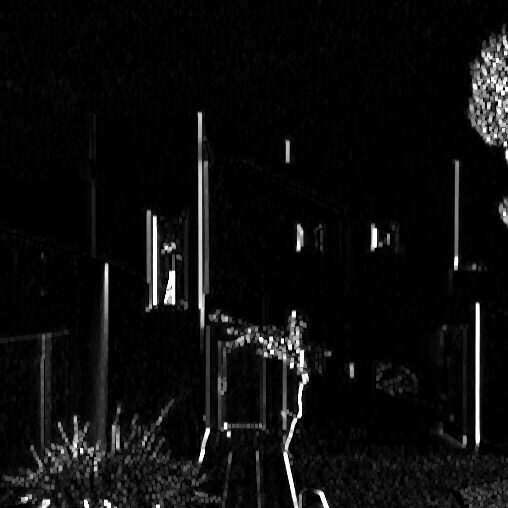

In [269]:
#for vertical edges
filter=[[1,0,-1],[1,0,-1],[1,0,-1]]
C=Convolution(image,filter,stride=1,padding=0)
fm=C.featuremap_calc()
pooled=C.maxpooling(fm,kernel_size=3,stride=1)
cv2_imshow(pooled)

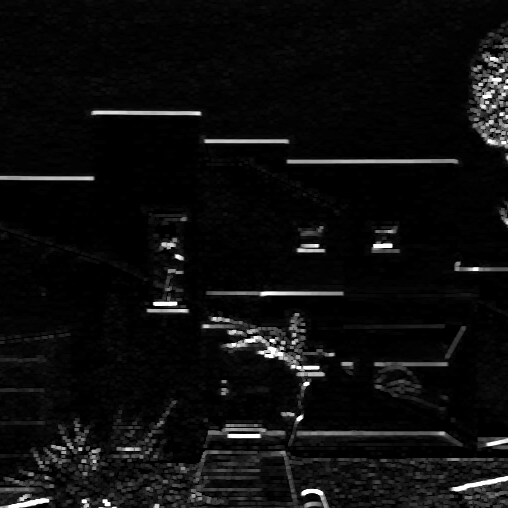

In [268]:
#for horizontal edges
filter=[[-1,-1,-1],[0,0,0],[1,1,1]]
C=Convolution(image,filter,stride=1,padding=0)
fm=C.featuremap_calc()
pooled=C.maxpooling(fm,kernel_size=3,stride=1)
cv2_imshow(pooled)